<a href="https://colab.research.google.com/github/mohammadsohail825/Costumer-Churn-Analysis/blob/main/Telecome_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data /Customer Churn.csv', encoding='unicode_escape')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#Total charge convert object to float.
df['TotalCharges'] = df["TotalCharges"].replace(" ","0") # replace nulll value in to 0
df['TotalCharges'] = df["TotalCharges"].astype("float")


In [8]:
df.info() # after converting total chart in float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df.isnull().sum().sum() # Check null values in all data.

0

In [11]:
df.describe() # Descrive the data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.duplicated().sum() # check duplicate values

0

In [13]:
df["customerID"].duplicated().sum() # Check duplicated value behalf of custumerID

0

In [14]:
# define function to SeniorCitizen column values convert 0,1 to yes or no
def conv(value):
  if value == 1:
    return "yes"
  else:
    return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv) # Apply function in Seniorcitizen column

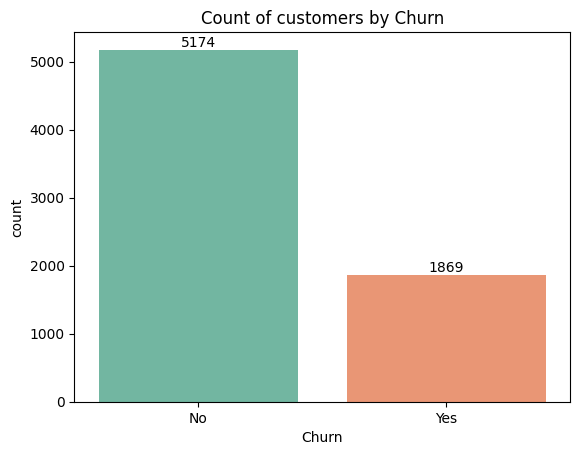

In [73]:
ax = sns.countplot(x='Churn', data=df, palette='Set2', hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of customers by Churn")
plt.show()

Count Churn out Costomers by using Countplot ther are 1869 costumer Churn out.

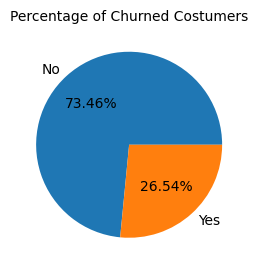

In [17]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':'count'})
plt.pie(gb["Churn"], labels=gb.index, autopct = '%1.2f%%')
plt.title("Percentage of Churned Costumers", fontsize =10)
plt.show()

The given pie chart we can cnclud 26.54% (1869) costumer have churned out

In [18]:
df.columns # Show all Columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

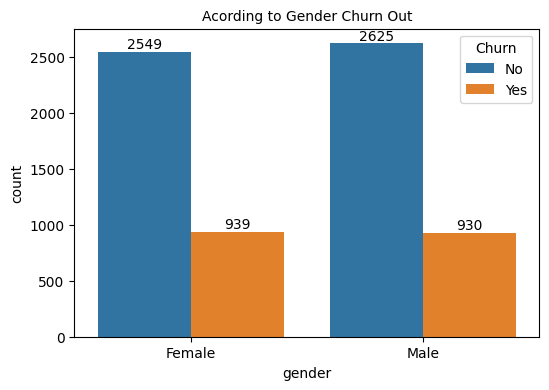

In [78]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x= 'gender', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Acording to Gender Churn Out", fontsize = 10)
plt.show()

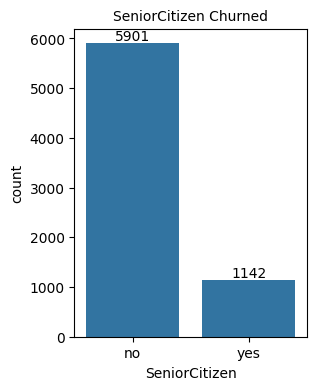

In [36]:
# Count plot for seniorcitizen churned out
plt.figure(figsize=(3,4))
ax = sns.countplot(x= 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title("SeniorCitizen Churned", fontsize = 10)
plt.show()

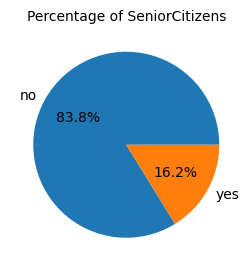

In [40]:
# Pie Chart for seniorcitizen churned out
plt.figure(figsize=(3,4))
gb = df.groupby("SeniorCitizen").agg({'SeniorCitizen':'count'})
plt.pie(gb["SeniorCitizen"], labels=gb.index, autopct = '%1.1f%%')
plt.title("Percentage of SeniorCitizens", fontsize =10)
plt.show()

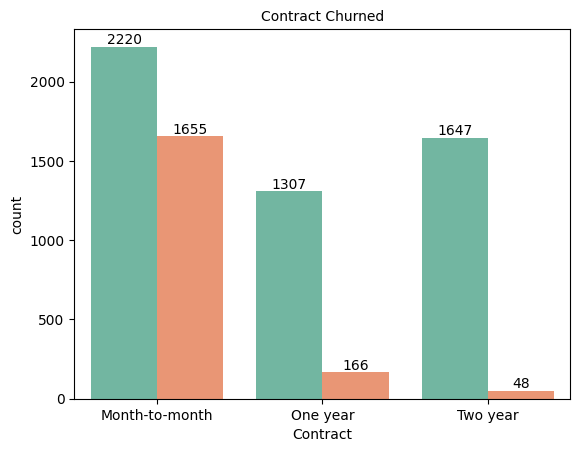

In [81]:
# Churned out by contrect basis.
ax= sns.countplot(x = 'Contract', data =df, palette='Set2',legend=False, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Contract Churned", fontsize = 10)
plt.show()

Uslly short term contract based people churn out early stage and who take longer duration contract they connect with us.


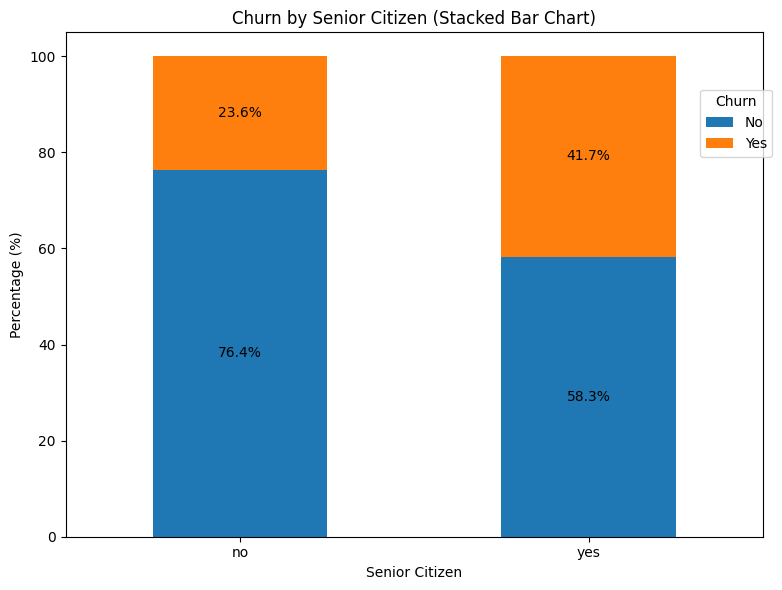

In [43]:
# Calculate total churn counts grouped by 'SeniorCitizen' and 'churn', with percentage normalization
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(8,6))  # Adjust figsize for better visualization

# Plot the stacked bar chart
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10)

# Title and labels
plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')

# Rotate x-axis labels if needed
plt.xticks(rotation=0)

# Customize legend location
plt.legend(title='Churn', bbox_to_anchor=(0.9, 0.9))

# Show the plot
plt.tight_layout()  # Ensure layout fits well
plt.show()


Above Stacked bar chart we show Churn out Senior Citizen acording to data


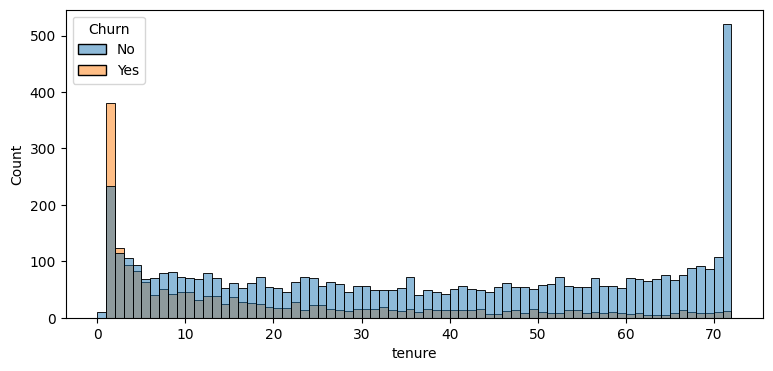

In [23]:
# Who have used sevices used services use short time and churned.
plt.figure(figsize=(9,4))
sns.histplot(x= 'tenure', data = df, bins = 72, hue = 'Churn')
plt.show()

People who have used our service for a long time 72 months and people who have used our services one or two month.
This chart connect to contrat chart which people tak yearly plane who stay with long terms.

In [47]:
df.columns.values # Check the column values for making subplot.

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

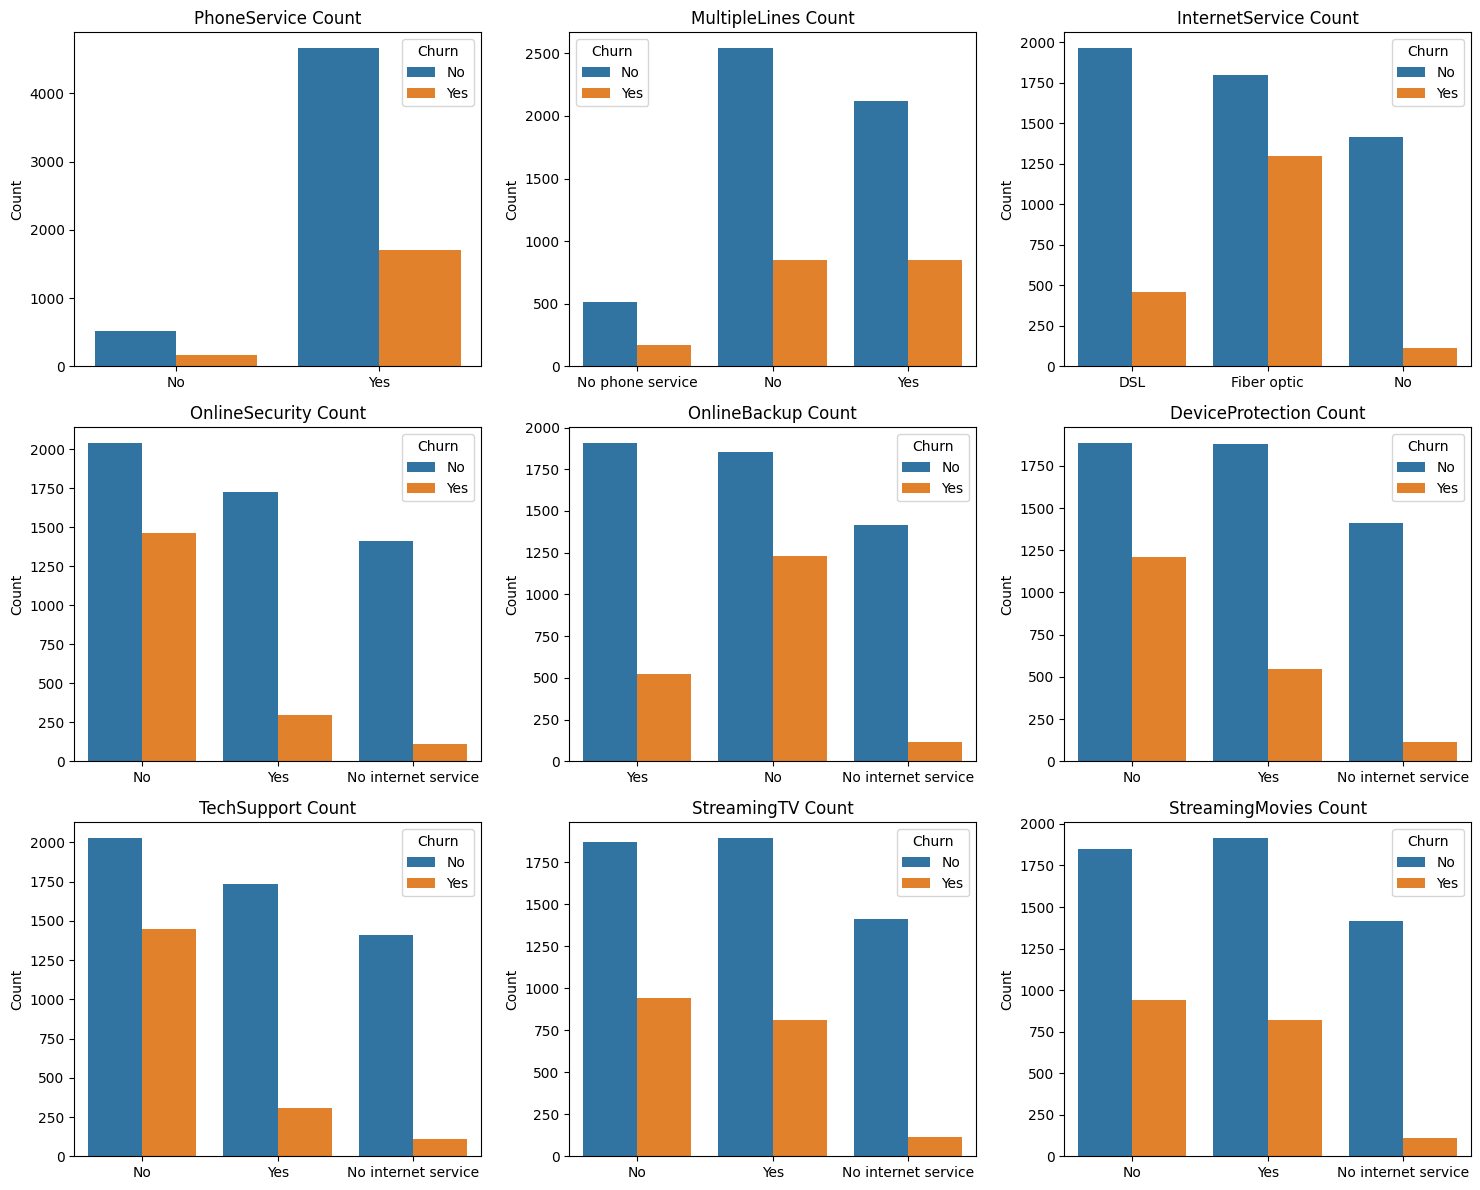

In [49]:
# List of columns to create countplots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots with 3 rows and 3 columns (adjust rows and cols if needed)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the columns and corresponding axes to create countplots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df['Churn'])
    axes[i].set_title(f'{col} Count')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


In this chart indicates that customers with no internet-related add-ons (like online security, backup, device protection, or tech support) show higher churn rates. Additionally, customers with fiber optic internet or multiple lines are more likely to churn compared to those using DSL or a single line. Basic services like phone service generally have lower churn rates.

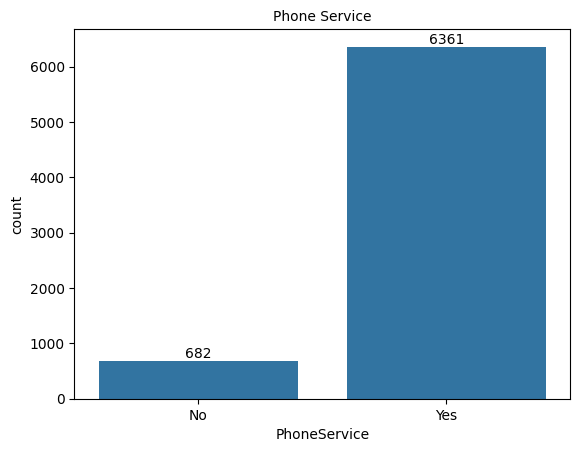

In [82]:
# Find people who using phone services.
ax= sns.countplot(x = 'PhoneService', data = df)
ax.bar_label(ax.containers[0])
plt.title('Phone Service', fontsize = 10)
plt.show()

Here above graph we show clearly most of the people using PhoneServices

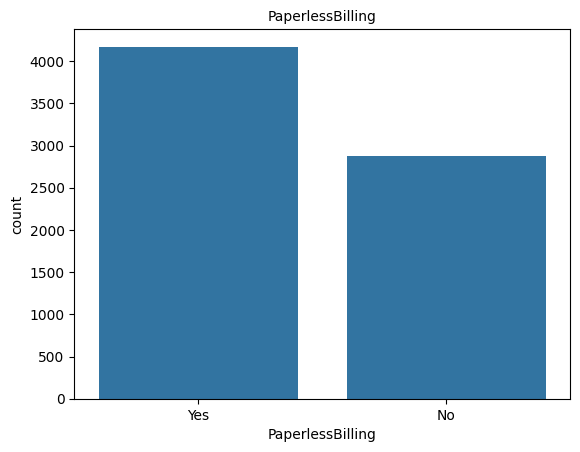

In [25]:
# PaperlessBilling
sns.countplot(x = 'PaperlessBilling', data = df)
plt.title('PaperlessBilling', fontsize = 10)
plt.show()

In this Chart showing people who using peperless Billing.

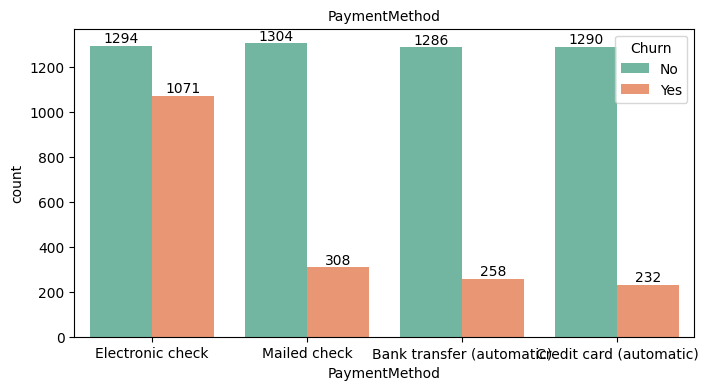

In [101]:
# PaymentMethod
plt.figure(figsize=(8,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, palette = 'Set2', hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('PaymentMethod', fontsize = 10)
plt.show()

Above Graph showing Payment Method it's very importent chart for us Churn out less, where Automatic payment method used

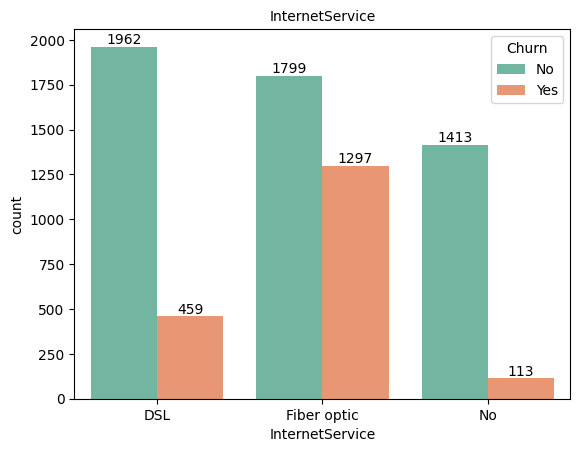

In [104]:
# InternetService
ax= sns.countplot(x = 'InternetService', data = df, palette = 'Set2', hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('InternetService', fontsize = 10)
plt.show()

Most of the people who churn out they used Fiber optic Internet Service use.

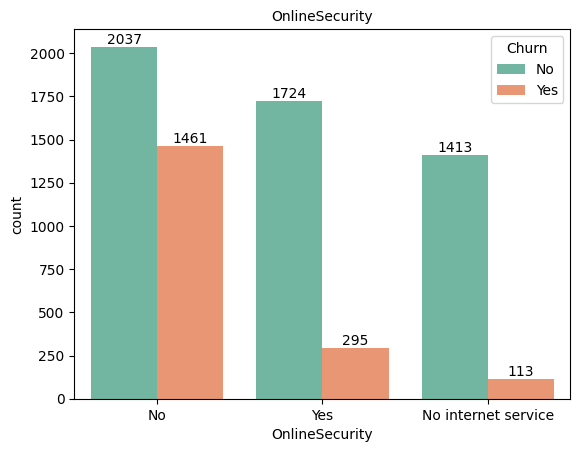

In [105]:
# OnlineSecurity
ax = sns.countplot(x = 'OnlineSecurity', data = df, palette='Set2', hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('OnlineSecurity', fontsize = 10)
plt.show()

People who not used online Security mostly churn out.

<ipython-input-108-33e536fedccb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='TechSupport', data =df, palette = 'Set2')


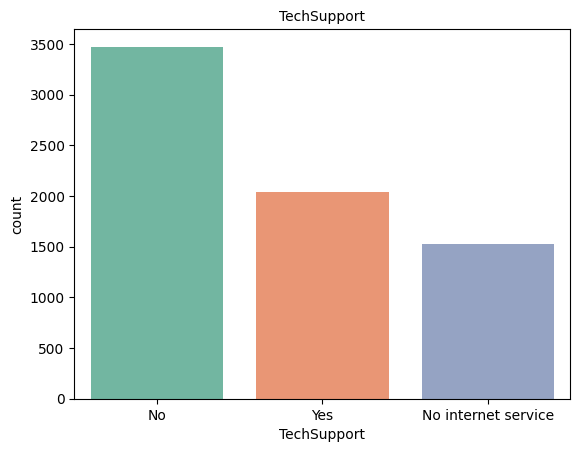

In [108]:
# TechSupport
sns.countplot(x ='TechSupport', data =df, palette = 'Set2')
plt.title('TechSupport', fontsize = 10)
plt.show()

<ipython-input-110-e15531380850>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'StreamingTV', data = df, palette = 'Set1')


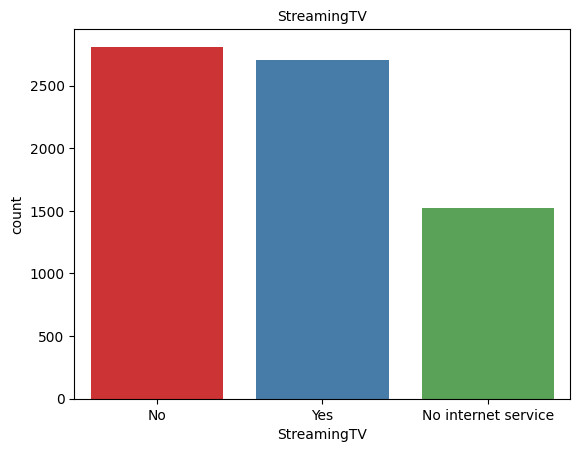

In [110]:
# StreamingTV
sns.countplot(x = 'StreamingTV', data = df, palette = 'Set1')
plt.title('StreamingTV', fontsize = 10)
plt.show()

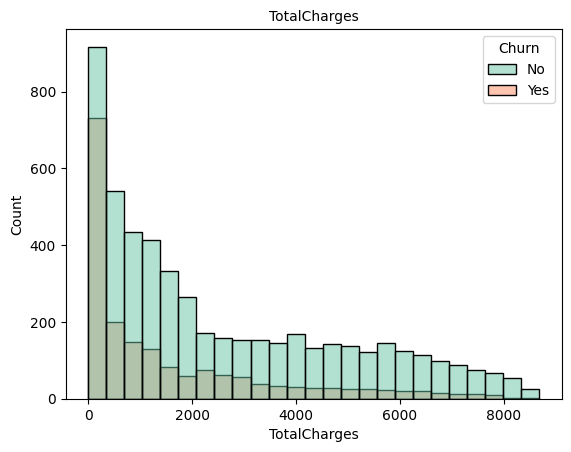

In [116]:
# TotalCharges
sns.histplot(x = 'TotalCharges', data = df, palette = 'Set2', hue = 'Churn')
plt.title('TotalCharges', fontsize = 10)
plt.show()

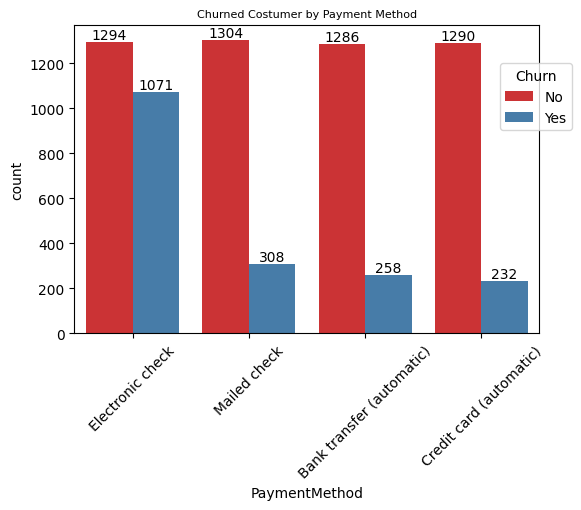

In [123]:
plt.figure(figsize=(6,4))
ax= sns.countplot(x = 'PaymentMethod', data = df, palette='Set1', hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned Costumer by Payment Method', fontsize = 8)
plt.legend(title='Churn', bbox_to_anchor=(0.9, 0.9))
plt.xticks(rotation=45)
plt.show()

Churned Costumer According to Payment Methood.

## Conclusion
***Based on our Analysis***

 **Service Subscriptions:** Customers with internet services, especially those with fiber optics, tend to churn more, particularly if they lack additional services like online security, backup, or tech support.

 **Contract Type:** Customers with month-to-month contracts have a higher churn rate compared to those with longer-term contracts (annual or two-year).

 **Payment Methods:** Those using electronic check payments show higher churn rates, possibly due to perceived convenience or payment issues.

**Demographics:** Senior citizens and customers without dependents appear more likely to churn.

**In summary** churn is influenced by service types, contract lengths, and payment methods, indicating that customers with more flexible contracts and fewer services are more likely to leave.
